In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.interpolate as interp
import scipy.stats as stats
import scipy.optimize as opt
import corner

%matplotlib inline

In [7]:
fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
# Explicitly set fontsizes:
font_size = 10
tick_size = 8

def load_params():
    return {
              #'backend': 'ps',
              'axes.labelsize': font_size,
              'text.fontsize': font_size,
              'legend.fontsize': font_size,
              'xtick.labelsize': tick_size,
              'ytick.labelsize': tick_size,
              'text.usetex': True,
              'figure.figsize': fig_size,
              }

def set_params(params):
    plt.rcParams.update(params)

    
#plot_settings()

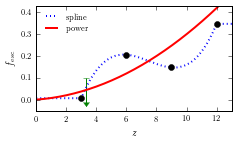

In [42]:
#Plot that shows the possible functions
def power(z,f_8,alpha):
    return np.min( [np.max([f_8*((z+1.0)/9.0)**alpha,0.0]), 1.0])

def tanh(z,f_0,f_inf,z_half,dz):
    t = np.tanh((z-z_half)/dz)
    return 0.5*(f_inf-f_0)*t+0.5*(f_inf+f_0)

def knots(z, z_knots, f_knots, style):
    
    if z<3.0:
        return f_knots[0]
    elif z>12.0:
        return f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind=style)
    
    return np.min([np.max([0.0,func(z)]), 1.0])

inch_size = 246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean))
ax = fig.add_subplot(111)

#fig_size =  [fig_width,fig_height*1.0]
#params = load_params()
#plt.rcParams.update(params)
#plot_settings()


    
    
z_pos = np.linspace(0,20,200)

#Knots
nknots=4
#z_knots = np.linspace(0,25,nknots)
z_knots = np.linspace(3,12,nknots)

f_knots = np.random.uniform(0,1,nknots) 

#print f_knots
f_knots = np.array([ 0.02235351,  0.51514863,  0.37060074,  0.86430903])*0.4

fesc = map(lambda x: knots(x,z_knots,f_knots,'cubic'),z_pos)
fesc2 = map(lambda x: knots(x,z_knots,f_knots,'linear'),z_pos)

plot_knots, = ax.plot(z_pos,fesc,'b',linewidth=2.0,linestyle='dotted')
#ax.plot(z_pos,fesc2,'b--',linewidth=1.5)

ax.plot(z_knots,f_knots,'ko',linewidth=2.0)


#Power law
fesc = map(lambda x: power(x,0.2,2.0), z_pos)
plot_power, = ax.plot(z_pos,fesc,'r',linewidth=2.0, linestyle='solid')

#Tanh
#fesc = map(lambda x: tanh(x,0.1,0.9,6.0,0.75), z_pos)
#fesc = map(lambda x: tanh(x,0.1,0.9,6.0,0.1), z_pos)
#plot_tanh, = ax.plot(z_pos,fesc,'k',linewidth=2.0, linestyle='dashed')

ax.errorbar([3.3],[0.1],yerr=0.125,uplims=[0.5],capsize=3)

#ax.set_ylim([-0.05,1.025])
ax.set_ylim([-0.05,0.425])

ax.set_xlim([0,13])


ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$f_\mathrm{esc}$')


#plt.setp(ax.get_xticklabels(), visible=False)


plt.legend([plot_knots, plot_power], 
           [r'$\mathrm{spline}$', r'$\mathrm{power}$'],
          loc='upper left',
          fontsize=8,
          frameon=False)

fig.tight_layout()

save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'fesc_priors.pdf')


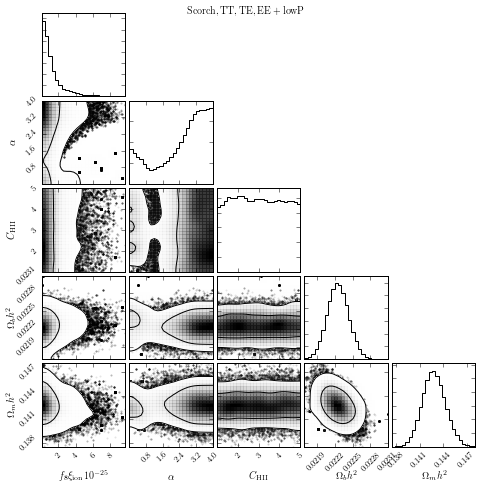

In [36]:
#Triangle plot for power law model

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data = np.loadtxt(direct+'chain_power_TTTEEE.dat')

params = load_params()
plt.rcParams.update(params)

to_plot = data[50000:,:]
to_plot2 = []
xi_index = 4
for here in to_plot:
    if here[xi_index]>24.0:# and here[3]<4 and here[3]>2 and here[4]<-9.5 and here[4]>-10.5 and here[5]>-0.36 and here[5]<-0.34 :
#        #here[-1]=10.0**here[-1]

        here2 = here
#        #print here2, here2[1], here2[-1]
#        #sys.exit()
        here2[1]=here2[1]*1e1**here2[xi_index]*1e-25
        #to_plot2.append(here2[:-1])
        to_plot2.append(here2)
to_plot = np.array(to_plot2)
#to_plot = to_plot[0::2,:]

to_plot = to_plot[:, [1,2,3,5,6]]

inch_size = 246.0*2.0/72.0

params = load_params()

fig = plt.figure(figsize=(inch_size, inch_size))
#ax = fig.add_subplot(111)
#plot_settings(size=246.0*2.0)

corner.corner(to_plot, 
                       figure=fig,
                       labels=[r'$f_8 \xi_{\rm ion} 10^{-25}$', r'$\alpha$', r'$C_\mathrm{HII}$', 
                               r'$\Omega_b h^2$',r'$\Omega_m h^2$'],
                       levels=[0.68,0.95],
                       color=u'k',
                       smooth=1.75,
                       bins=25, 
                       linewidth=2.0,
                       fontsize=13,
                       figsize = (inch_size, inch_size),
                       cmap='Blues',
                       smooth1d=1.25)

fig = plt.gcf()
fig.set_size_inches(inch_size, inch_size)
#fig.savefig('test2png.png', dpi=100)

fig.suptitle(r'${\rm Scorch, TT,TE,EE+lowP}$')


save=True
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'corner_power_TTTEEE_Scorch.pdf')

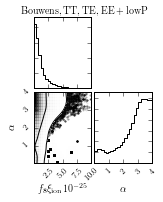

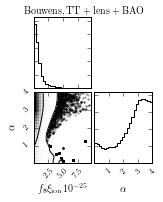

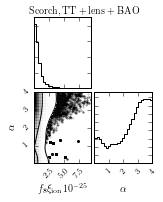

In [35]:
#Reduced triangle plots for alt power law model

direct='/Users/laynep/work/reionization/importance_sampler/python_implementation/'
data = np.loadtxt(direct+'chain_power_TTTEEE_Bouwens.dat')
name_list = ['chain_power_TTTEEE_Bouwens','chain_power_lensing_BAO_Bouwens','chain_power_lensing_BAO']

for name in name_list:
    data = np.loadtxt(direct+name +'.dat')
    
    params = load_params()
    plt.rcParams.update(params)

    to_plot = data[50000:,:]
    to_plot2 = []
    xi_index = 4
    for here in to_plot:
        if here[xi_index]>24.0:# and here[3]<4 and here[3]>2 and here[4]<-9.5 and here[4]>-10.5 and here[5]>-0.36 and here[5]<-0.34 :
    #        #here[-1]=10.0**here[-1]

            here2 = here
    #        #print here2, here2[1], here2[-1]
    #        #sys.exit()
            here2[1]=here2[1]*1e1**here2[xi_index]*1e-25
            #to_plot2.append(here2[:-1])
            to_plot2.append(here2)
    to_plot = np.array(to_plot2)
    #to_plot = to_plot[0::2,:]

    to_plot = to_plot[:, [1,2]]

    inch_size = 246.0*2/72.0/3.1

    params = load_params()

    fig = plt.figure(figsize=(inch_size, inch_size))
    #ax = fig.add_subplot(311)
    #plot_settings(size=246.0*2.0)

    corner.corner(to_plot, 
                           figure=fig,
                           labels=[r'$f_8 \xi_{\rm ion} 10^{-25}$', r'$\alpha$', r'$C_\mathrm{HII}$', 
                                   r'$\Omega_b h^2$',r'$\Omega_m h^2$'],
                           levels=[0.68,0.95],
                           color=u'k',
                           smooth=1.75,
                           bins=25, 
                           linewidth=2.0,
                           max_n_ticks=4,
                           #fontsize=10,
                           smooth1d=1.25)

    fig = plt.gcf()
    fig.set_size_inches(inch_size, inch_size*2*golden_mean)
      
    
    if 'Bouwens' in name:
        if 'BAO' in name:
            fig.suptitle(r'${\rm Bouwens, TT+lens+BAO}$')
        else:
            fig.suptitle(r'${\rm Bouwens, TT,TE,EE+lowP}$')

    else:
        fig.suptitle(r'${\rm Scorch, TT+lens+BAO}$')


    save=True
    if save:
        direct2='/Users/laynep/work/papers/reionization/plots/'
        plt.savefig(direct2+name +'.pdf')

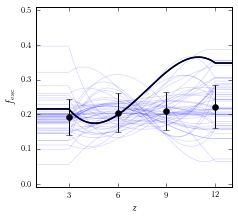

In [34]:
#Error bar plot for knotted sky f_esc
direct='/Users/laynep/work/reionization/reion_data/DATA_CLEAN/'
data = pd.read_csv(direct+'data_reion_polint_MARGCOSMO.txt')

def knots(z, z_knots, f_knots, style):
    
    if z<3.0:
        return f_knots[0]
    elif z>12.0:
        return f_knots[-1]
    else:
    
        func = interp.interp1d(z_knots, f_knots, kind=style)
    
    return np.min([np.max([0.0,func(z)]), 1.0])

inch_size = 246.0/72.0
fig = plt.figure(figsize=(inch_size, inch_size*golden_mean*1.5))
ax = fig.add_subplot(111)
params = load_params()
plt.rcParams.update(params)

z_knots = np.linspace(3,12,4)
nknots = len(z_knots)
f_knots = data[['f_esc_params'+str(i) for i in xrange(nknots)]]


max_loc = data['like'].argmax()

f_knots_maxlike = np.array(f_knots)[max_loc]

z_vals = np.linspace(1,16,200)
f_vals = map( lambda x: knots(x, z_knots, f_knots_maxlike, 'cubic'), z_vals)


f_knots_rand = [np.array(f_knots)[ii] for ii in np.random.randint(0,len(f_knots),50)]
for fkn in f_knots_rand:
    f_vals2 = map( lambda x: knots(x, z_knots, fkn, 'cubic'), z_vals)
    ax.plot(z_vals, f_vals2, 'b-', alpha=0.15, linewidth=0.75 )


ax.plot(z_vals,f_vals, 'b-', linewidth=1.5)


mean_z = [np.mean(data['f_esc_params'+str(i)]) for i in xrange(nknots)]
std_z = [np.sqrt(np.var(data['f_esc_params'+str(i)])) for i in xrange(nknots)]

ax.plot(z_vals,f_vals, 'k-', linewidth=1.5)

ax.errorbar(z_knots,mean_z,  yerr = std_z, fmt='o', color='k')

ax.set_ylim([-0.01,0.51])
ax.set_xlim([1,13])
ax.set_xticks([3,6,9,12])
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$f_\mathrm{esc}$')

plt.tight_layout()

save=False
if save:
    direct='/Users/laynep/work/papers/reionization/plots/'
    plt.savefig(direct+'polint_errorplot.pdf')



In [ ]:
data = np.loadtxt('/Users/laynep/work/reionization/importance_sampler/python_implementation/'+'lcdm_tau_lensing.txt')

#histbins = plt.hist(data,bins=35,range=[0.0675,0.0901],normed=True)
histbins = plt.hist(data,bins=35,range=[0.06,0.095],normed=True)


for x in zip(histbins[0],histbins[1]):
    print x[0],x[1]

In [ ]:
#Best-fit Schecter parameters from 1506.01035

z_list = np.linspace(0,15,25)
M_list = -20.97 + 0.17*(z_list-6.0)
phi_list = 0.45*10.0**(-0.21*(z_list-6.0))*1e-3
alpha_list = -1.91 - 0.13*(z_list-6.0)

for out in zip(z_list,phi_list,M_list,alpha_list):
    print out[:]

In [ ]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB/base_plikHM_TTTEEE_lowTEB_4.txt')

data = np.concatenate((data1,data2,data3,data4),axis=0)

In [ ]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TT_lowl_lensing/base_plikHM_TT_lowl_lensing_post_BAO_4.txt')

datax = np.concatenate((data1,data2,data3,data4),axis=0)

In [ ]:
#Planck chains
data1 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_1.txt')
data2 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_2.txt')
data3 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_3.txt')
data4 = np.loadtxt('/Users/laynep/work/planck_chains/COM_CosmoParams_fullGrid_R2.00/base/plikHM_TTTEEE_lowTEB_lensing/base_plikHM_TTTEEE_lowTEB_lensing_4.txt')

datay = np.concatenate((data1,data2,data3,data4),axis=0)

In [ ]:
x1,x2,x3 = plt.hist(data[:,5],bins=40,normed=True,histtype='step')
x1,x2,x3 = plt.hist(datax[:,5],bins=35,normed=True,histtype='step')
x1,x2,x3 = plt.hist(datay[:,5],bins=35,normed=True,histtype='step')



In [ ]:
test = map(lambda x: np.mean(datax[:,x]), xrange(len(datax[0])))
ombh2 = test[2]
ommh2 = test[3]
logA = test[6]
ns = test[7]
H0 = test[23]
#H0 = test[35]
sig8 = test[29]
#sig8 = test[41]


print ombh2, ommh2, logA, ns, H0, sig8

In [ ]:
10.0**-5.221